# Image Segmentation using KMeans


In [161]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [162]:
im=cv2.imread('sahil.jpg')

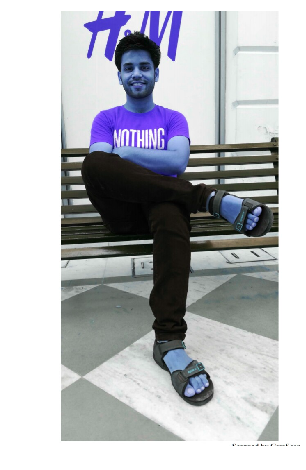

In [163]:
plt.figure(0,figsize=(10,8))
plt.imshow(im)
plt.axis("off")
plt.show()

In [164]:
original_shape=im.shape
print(original_shape)

(1062, 636, 3)


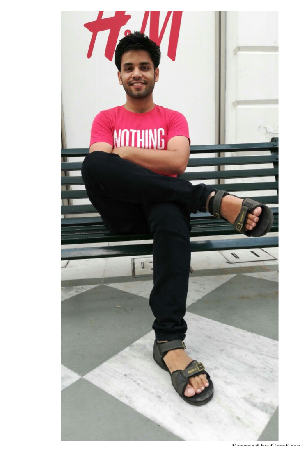

In [165]:
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)  # conversion of bgr to rgb
plt.figure(0,figsize=(10,8))
plt.imshow(im)
plt.axis("off")
plt.show()

In [166]:
print(im.shape)

(1062, 636, 3)


# flatten the image

In [167]:
im=im.reshape((-1,3))

In [168]:
im.shape

(675432, 3)

# KMEANS

In [126]:
from sklearn.cluster import KMeans

In [195]:
dominant_color=6
km=KMeans(n_clusters=dominant_color)

In [196]:
km.fit(im)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [197]:
km.cluster_centers_

array([[245.60088727, 245.88838482, 244.61691596],
       [100.73208163,  98.60423438,  91.03784431],
       [159.85442584, 157.45495819, 147.72878636],
       [213.1158204 , 212.20630662, 208.13981296],
       [218.64306182,  66.07009814,  95.18271366],
       [ 22.6145644 ,  25.82489234,  24.35510354]])

In [198]:
km.labels_

array([0, 0, 0, ..., 2, 1, 5])

In [199]:
centers=km.cluster_centers_
centers=np.array(centers,dtype="uint8")

In [200]:
centers

array([[245, 245, 244],
       [100,  98,  91],
       [159, 157, 147],
       [213, 212, 208],
       [218,  66,  95],
       [ 22,  25,  24]], dtype=uint8)

# plot of dominant colors

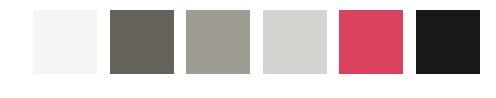

In [202]:
i=1
colors=[]
plt.figure(0,figsize=(8,2))
for kx in centers:
    plt.subplot(1,6,i)
    i+=1
    plt.axis("off")
    
    colors.append(kx)
    a=np.zeros((100,100,3),dtype="uint8")
    a[:,:,:]=kx
    plt.imshow(a)
plt.show()

In [203]:
colors

[array([245, 245, 244], dtype=uint8),
 array([100,  98,  91], dtype=uint8),
 array([159, 157, 147], dtype=uint8),
 array([213, 212, 208], dtype=uint8),
 array([218,  66,  95], dtype=uint8),
 array([22, 25, 24], dtype=uint8)]

In [204]:
# these are the predicted labels of all pixels : telling us eac pixel belongs to which cluster 
# or class
np.unique(km.labels_)

array([0, 1, 2, 3, 4, 5])

In [205]:
km.labels_.shape

(675432,)

we will assign the pixel of our original image to predicted labels ---->> image segmentation

In [206]:
new_img=np.zeros((km.labels_.shape[0],3),dtype="uint8")

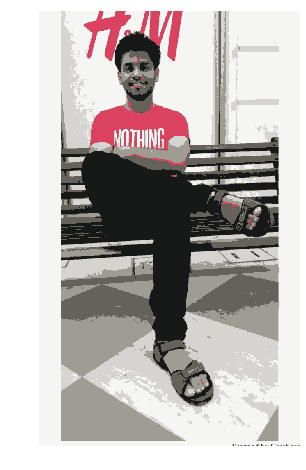

In [207]:
for pixel in range(new_img.shape[0]):
    new_img[pixel]=colors[km.labels_[pixel]]
new_img=new_img.reshape((original_shape))
plt.figure(0,figsize=(10,8))
plt.imshow(new_img)
plt.axis("off")
plt.show()